In [1138]:
from src import Prep
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import * 
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%reload_ext autoreload

In [1145]:
%autoreload

# DATA

## Load in, clean, sort, and filter data

In [4]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 33.880105 seconds.
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 2.689751 seconds.
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
Elapsed time is 50.528228 seconds.
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------

In [6]:
y = time_frame(df)

# REGRESSION

## Run through basic regression models: 
#### - OLS Regression
#### - Linear Regression
#### - Random Forest Regressor 

In [774]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

,MSE
Models,
OLS,0.12084
LINEAR,0.55597
RF,0.01917


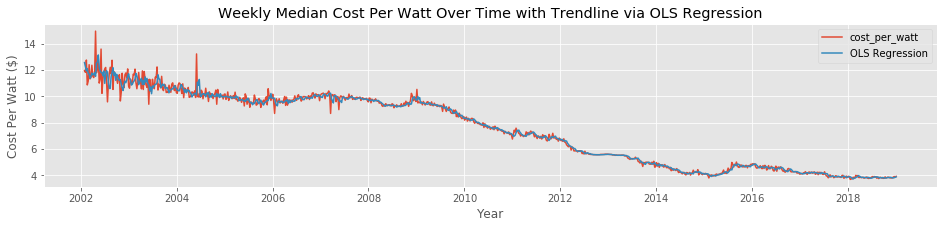

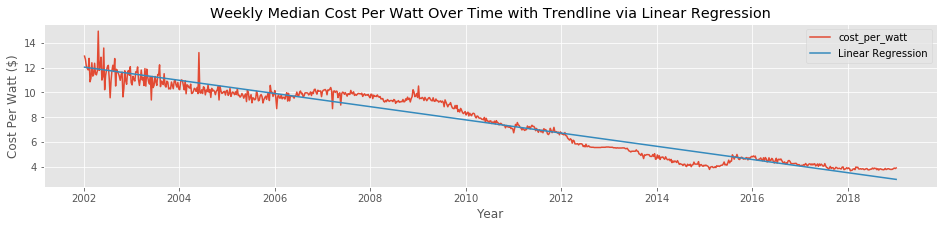

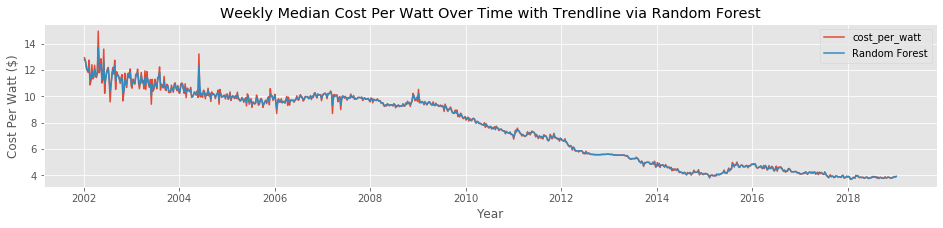

In [18]:
plot_regres_model(y[3:], ols_trend, 'OLS Regression')
plot_regres_model(y, linear_trend, 'Linear Regression')
plot_regres_model(y, rf_trend, 'Random Forest')

# Run through basic average model

In [731]:
# Returns simple forecast based on shifted data of 1 week and 3 week lags
simple_move(y)

MSE of cost_1weekago = 0.0046
MSE of cost_3weeksago = 0.008


# TIME SERIES

## Check for Stationarity

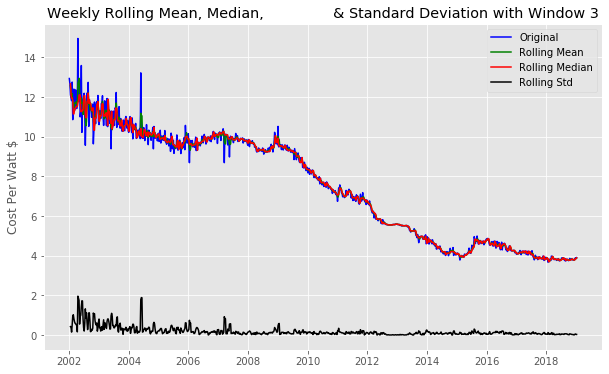

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [20]:
rolling_plot(y)
dfuller_test(y)

In [754]:
test_for_stationarity(y)

ADF p-value: 0.62
Time Series is not stationary. Fail to reject ADF H0


## Transform data to be stationary 

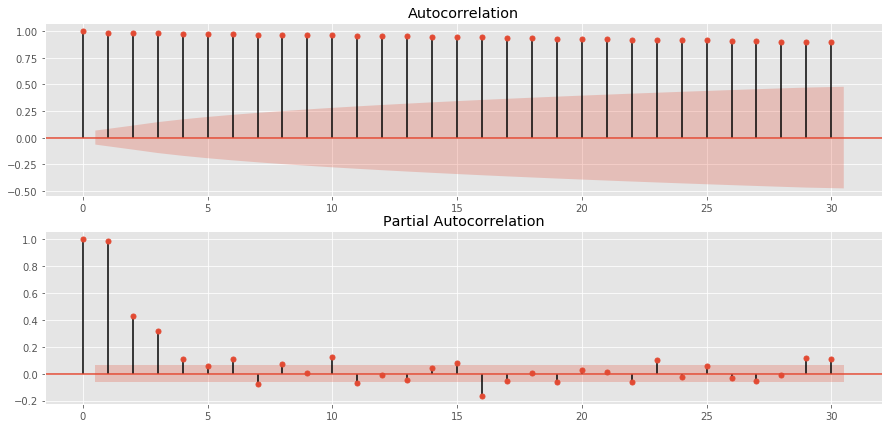

In [21]:
autocor_plots(y)

## Create differenced data

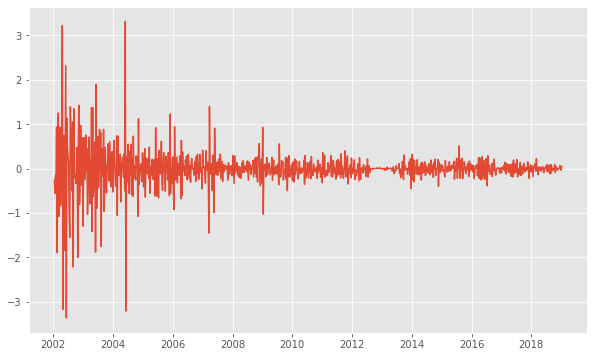

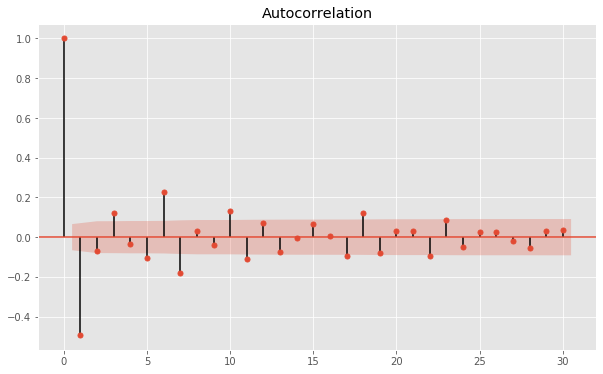

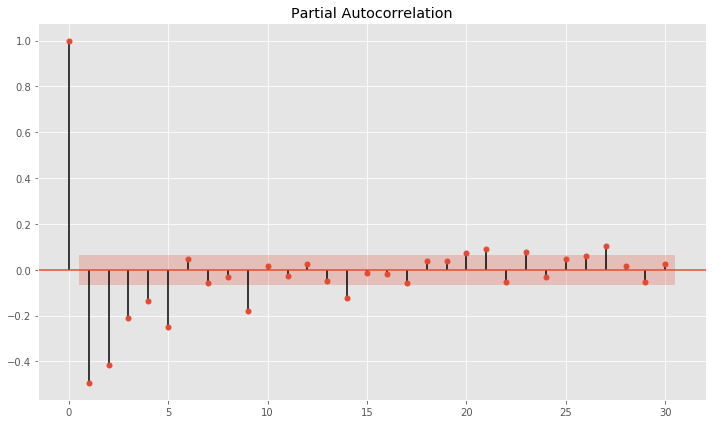

In [1062]:
diff = get_differences(y)
diff = diff.dropna()

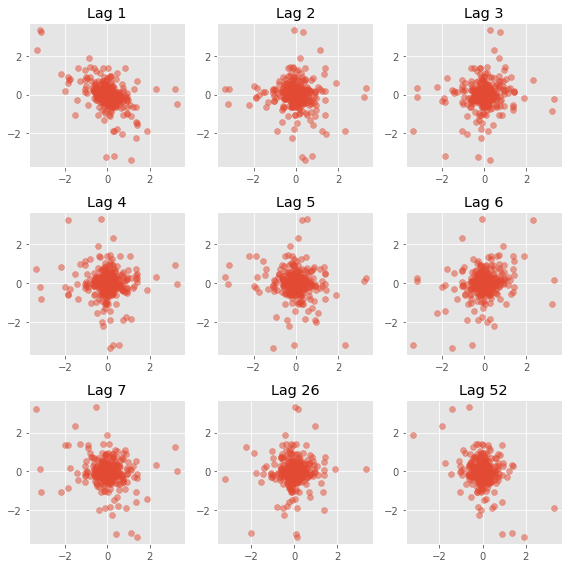

In [1063]:
plot_ac_scat(diff)

## Given differenced data, check for stationarity again

In [1064]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


## Visualize Differenced Data 

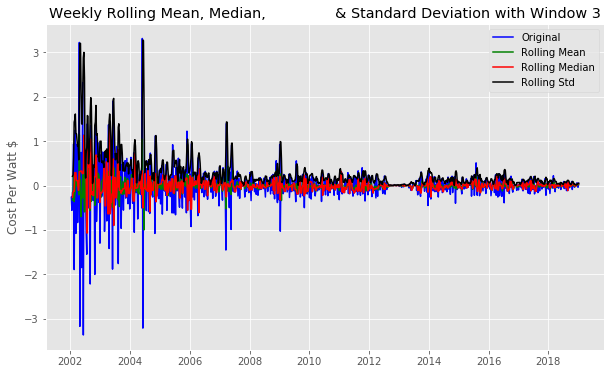

Results of Dickey-Fuller Test:
Test Statistic         -6.775243e+00
p-value                 2.580703e-09
#Lags Used              2.100000e+01
#Observations Used      8.650000e+02
Critical Value (1%)    -3.437932e+00
Critical Value (5%)    -2.864887e+00
Critical Value (10%)   -2.568552e+00
dtype: float64


In [1065]:
rolling_plot(diff)
dfuller_test(diff)

## Run through basic ARMA Forecast

### Get suggested ARMA P,D parameters

In [1122]:
%autoreload

In [1080]:
arma_pd = auto_arma_pd(diff)

P, D parameters to use in ARMA model = (4, 0)


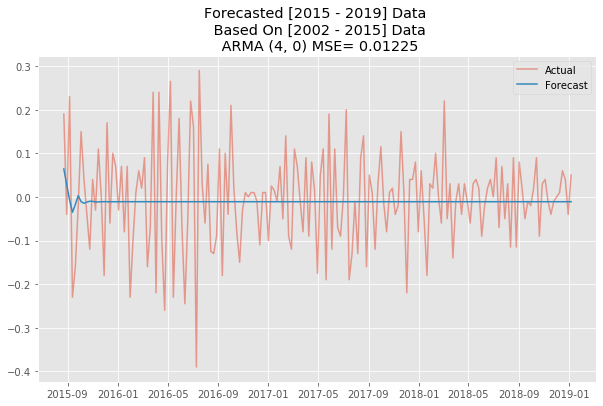

In [1132]:
# Uses auto_arima pd order
# Does not use years model
# Does plot results
arma_model(diff, arma_pd, 0, True, False)

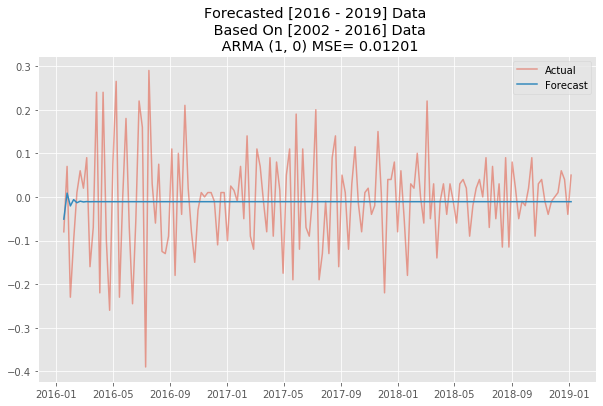

In [1129]:
# Uses inputted pd order
# Does use years model
# Years = 3
# Does plot results
arma_model(diff, (1,0), 3, plot=True, use_years=True)

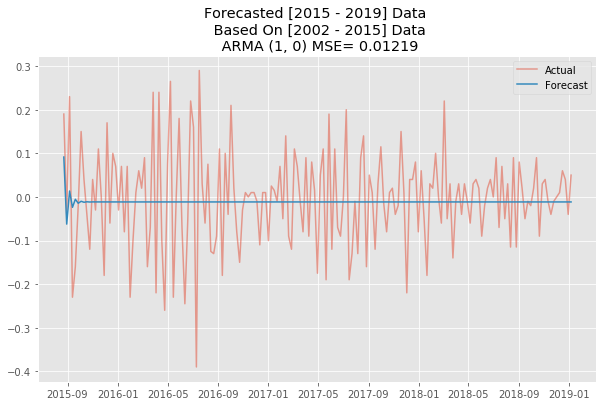

In [1131]:
# Uses inputted pd order
# Does not use years model
# Does plot results
arma_model(diff, (1,0), 0, True, False)

In [1134]:
# Uses auto_arima pd
# Does use years model
# Years = 2
# Does not plot results
arma_model(diff, arma_pd, 2, False, True)

ARMA Order Used: (4, 0)
MSE: 0.0076


In [800]:
# Add on ARMA's MSE score
reg_scores = score_table(y, ols_model, linear_model, rf_model)
reg_scores = reg_scores.T
reg_scores['ARMA(1,0) 3Y'] = 0.01201
reg_scores['ARMA()']
reg_scores = reg_scores.T
reg_scores.sort_values(by='MSE')

,MSE
Models,
"ARMA(1,0) 3Y",0.01201
RF,0.01917
OLS,0.12084
LINEAR,0.55597


# ARIMA MODEL

### Get suggested ARIMA P,D,Q parameters

In [1073]:
arima_pdq = auto_arima_pdq(diff)

P, D, Q parameters to use in ARIMA model = (4, 0, 3)


In [97]:
arima_order_mses(diff)

ARIMA(0, 0, 0) MSE=0.016
ARIMA(0, 0, 1) MSE=0.018
ARIMA(0, 0, 2) MSE=0.018
ARIMA(0, 0, 3) MSE=0.018
ARIMA(0, 1, 0) MSE=0.045
ARIMA(0, 1, 1) MSE=0.016
ARIMA(0, 1, 2) MSE=0.018
ARIMA(0, 1, 3) MSE=0.018
ARIMA(0, 2, 0) MSE=0.147
ARIMA(0, 2, 1) MSE=0.045
ARIMA(0, 2, 2) MSE=0.017
ARIMA(0, 2, 3) MSE=0.019
ARIMA(1, 0, 0) MSE=0.014
ARIMA(1, 0, 1) MSE=0.018
ARIMA(1, 0, 2) MSE=0.018
ARIMA(1, 0, 3) MSE=0.018
ARIMA(1, 1, 0) MSE=0.028
ARIMA(1, 1, 3) MSE=0.018
ARIMA(1, 2, 0) MSE=0.070
ARIMA(2, 0, 0) MSE=0.013
ARIMA(2, 0, 1) MSE=0.018
ARIMA(2, 0, 2) MSE=0.018
ARIMA(2, 0, 3) MSE=0.018
ARIMA(2, 1, 0) MSE=0.022
ARIMA(2, 2, 0) MSE=0.047
ARIMA(4, 0, 0) MSE=0.013
ARIMA(4, 0, 1) MSE=0.018
ARIMA(4, 0, 2) MSE=0.018
ARIMA(4, 0, 3) MSE=0.019
ARIMA(4, 1, 0) MSE=0.017
ARIMA(4, 1, 1) MSE=0.013
ARIMA(4, 2, 0) MSE=0.033
Best ARIMA (4, 1, 1) MSE=0.013


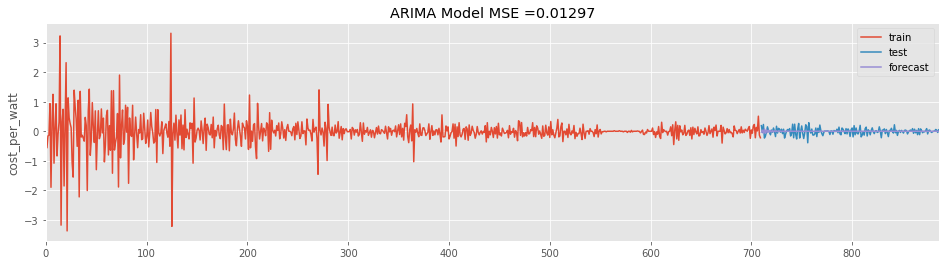

In [1059]:
skt_arima(diff, auto_arima(diff.dropna()).order)

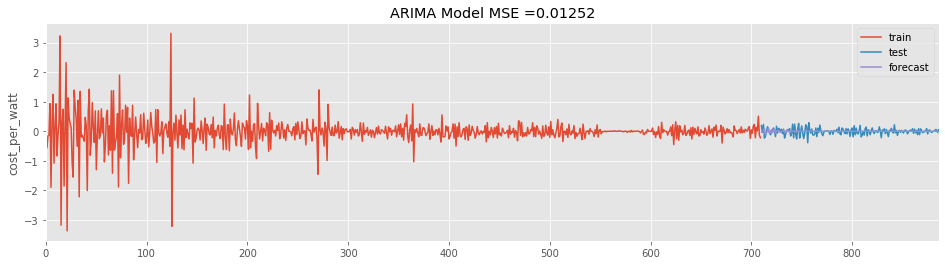

In [1047]:
skt_arima(diff, (7,0,7))

In [1143]:
%autoreload

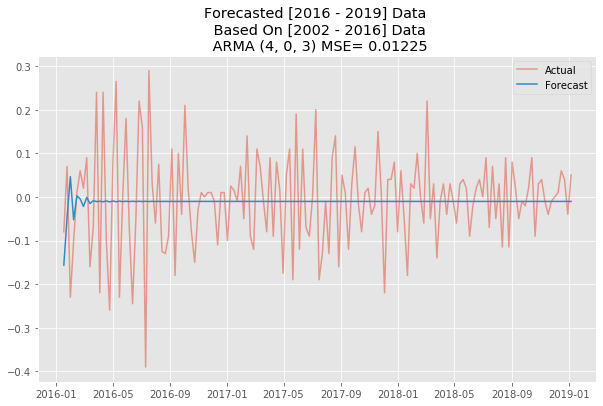

In [1141]:
arima_model(diff, arima_pdq, 3, plot=True, use_years=True)

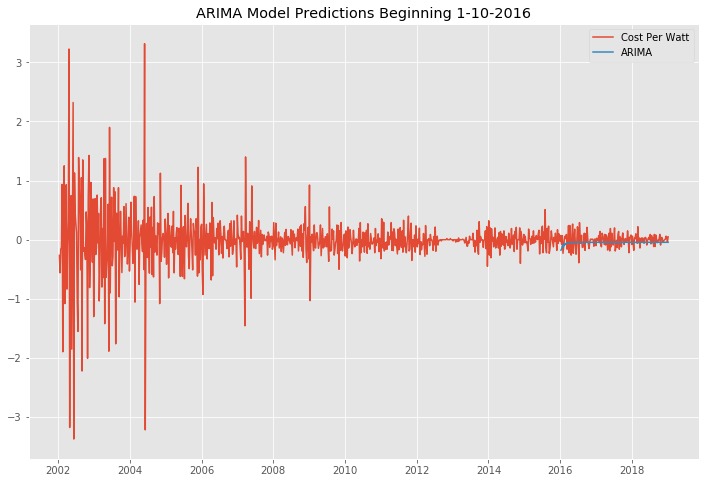

ValueError: Found input variables with inconsistent numbers of samples: [157, 156]

In [1144]:
arima_model_forecast(diff)